# ANÁLISE DE FUNCIONAMENTO DO MODELO RANDOM FOREST PARA ACEITE DE NAVIOS

In [2]:
#IMPORTANDO BIBLIOTECAS NECESSÁRIAS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

## VISUALIZAÇÃO E COMPREENSÃO DOS DADOS

In [3]:
#ABRINDO ARQUIVOS EM DATAFRAMES
df_treino = pd.read_csv('dados_treino.csv')
df_testagem = pd.read_csv('dados_testagem.csv')

In [4]:
#VISUALIZAÇÃO DOS DADOS DE SIMULAÇÃO COM CLASSES 'BALANCEADAS'
df_treino.head(20)

,Unnamed: 0,Nome,LOA (m),Boca (m),DWT (ton),Calado de Entrada (m),Calado de Saída (m),Calado Aéreo (m),Pontal (m),Tamanho de Lança (m),Ano de Construção,Tipo do Navio,Último Porto,Próximo Porto,Situação
0,0,Navio351,19,17,187501,9,15,25,14,103,2017,GSM,Porto45,Porto106,1
1,1,Navio633,39,6,145781,13,11,30,9,88,2022,GS,Porto100,Porto125,0
2,2,Navio508,59,13,57439,17,10,27,17,108,2006,CG,Porto115,Porto176,0
3,3,Navio646,32,14,43275,17,12,28,7,113,2004,CNTR,Porto135,Porto46,1
4,4,Navio92,36,7,192345,11,8,27,6,65,2009,GSM,Porto91,Porto9,1
5,5,Navio267,50,8,37344,18,14,20,18,14,2020,CNTR,Porto6,Porto161,0
6,6,Navio285,26,11,92961,10,10,18,17,89,2007,CNTR,Porto43,Porto39,0
7,7,Navio1035,26,8,133830,15,14,30,12,32,2018,CG,Porto152,Porto186,0
8,8,Navio462,47,8,194312,15,13,24,15,97,2009,GS,Porto179,Porto101,1
9,9,Navio522,45,17,149605,13,12,24,17,84,1998,GL,Porto110,Porto146,1


In [5]:
#VISUALIZAÇÃO DOS DADOS DE SIMULAÇÃO COM CLASSES 'DESBALANCEADAS'
df_testagem.head(20)

,Unnamed: 0,Nome,LOA (m),Boca (m),DWT (ton),Calado de Entrada (m),Calado de Saída (m),Calado Aéreo (m),Pontal (m),Tamanho de Lança (m),Ano de Construção,Tipo do Navio,Último Porto,Próximo Porto,Situação
0,0,Navio3404,32,7,130453,14,18,29,17,84,2022,CG,Porto87,Porto9,0
1,1,Navio2506,30,8,147590,17,18,19,17,29,2008,CG,Porto74,Porto36,0
2,2,Navio3864,24,7,165016,14,19,32,5,30,2016,GS,Porto155,Porto192,1
3,3,Navio3976,18,13,44752,17,10,32,6,107,2011,CNTR,Porto109,Porto152,0
4,4,Navio3277,21,15,138212,17,18,23,11,85,2006,GLP,Porto199,Porto108,0
5,5,Navio2883,55,16,130903,17,18,33,6,35,2014,CG,Porto80,Porto145,0
6,6,Navio2164,35,16,146510,14,13,14,5,51,2006,GSM,Porto53,Porto40,0
7,7,Navio2515,42,14,128831,8,17,12,15,110,2013,CNTR,Porto194,Porto115,0
8,8,Navio3092,24,17,137622,12,14,32,19,22,2007,CNTR,Porto190,Porto51,0
9,9,Navio3919,55,17,78977,16,18,21,10,111,2017,CNTR,Porto61,Porto43,0


In [6]:
#INFOS SOBRE TIPAGEM DE DADOS 
print(df_testagem.info())
print(df_treino.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             1000 non-null   int64 
 1   Nome                   1000 non-null   object
 2   LOA (m)                1000 non-null   int64 
 3   Boca (m)               1000 non-null   int64 
 4   DWT (ton)              1000 non-null   int64 
 5   Calado de Entrada (m)  1000 non-null   int64 
 6   Calado de Saída (m)    1000 non-null   int64 
 7   Calado Aéreo (m)       1000 non-null   int64 
 8   Pontal (m)             1000 non-null   int64 
 9   Tamanho de Lança (m)   1000 non-null   int64 
 10  Ano de Construção      1000 non-null   int64 
 11  Tipo do Navio          1000 non-null   object
 12  Último Porto           1000 non-null   object
 13  Próximo Porto          1000 non-null   object
 14  Situação               1000 non-null   int64 
dtypes: int64(11), object(4

In [7]:
# EXCLUINDO COLUNA ERRÔNEA DOS DADOS
df_treino = df_treino.drop(columns=['Unnamed: 0'])
df_testagem = df_testagem.drop(columns=['Unnamed: 0'])

In [8]:
#df_testagem
df_treino

,Nome,LOA (m),Boca (m),DWT (ton),Calado de Entrada (m),Calado de Saída (m),Calado Aéreo (m),Pontal (m),Tamanho de Lança (m),Ano de Construção,Tipo do Navio,Último Porto,Próximo Porto,Situação
0,Navio351,19,17,187501,9,15,25,14,103,2017,GSM,Porto45,Porto106,1
1,Navio633,39,6,145781,13,11,30,9,88,2022,GS,Porto100,Porto125,0
2,Navio508,59,13,57439,17,10,27,17,108,2006,CG,Porto115,Porto176,0
3,Navio646,32,14,43275,17,12,28,7,113,2004,CNTR,Porto135,Porto46,1
4,Navio92,36,7,192345,11,8,27,6,65,2009,GSM,Porto91,Porto9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Navio243,48,12,151668,8,19,30,12,112,2004,CG,Porto5,Porto159,1
996,Navio411,22,8,95318,16,10,28,19,12,2001,GL,Porto107,Porto184,1
997,Navio315,23,12,76514,11,19,22,5,50,2010,GL,Porto31,Porto188,1
998,Navio225,18,7,42813,13,10,11,12,111,2007,GSM,Porto188,Porto79,0


In [9]:
#BALANCEAMENTO DE CLASSE DO DATAFRAME DE TREINO
df_treino['Situação'].value_counts() #TREINAMENTO DO MODELO COM CLASSES BALANCEADAS

Situação
1    500
0    500
Name: count, dtype: int64

In [10]:
# CRIAÇÃO DE DATAFRAME CONTENDO DEMAIS INFORMAÇÕES DOS MODELOS A SEREM TESTADOS POSTERIORMENTE
df_resultados = pd.DataFrame(columns=['Modelo', 'Treino', 'Acurácia', 'Precisão', 'Recall', 'F1-Score', 'Especificidade'])
df_resultados

,Modelo,Treino,Acurácia,Precisão,Recall,F1-Score,Especificidade


## TRATAMENTO DOS DADOS E CONFIGURAÇÃO DO MODELO

In [11]:
#DEFINIÇÃO DOS PREVISORES E CLASSES
indices_previsores = [1, 2, 3, 4, 5, 9]
#LOA, BOCA, DWT, CALADO DE ENTRADA, CALADO DE SAÍDA, ANO DE CONSTRUÇÃO

previsores_treino = df_treino.iloc[:, indices_previsores].values
classe_treino = df_treino.iloc[:, 13].values

previsores_testagem = df_testagem.iloc[:, indices_previsores].values
classe_testagem = df_testagem.iloc[:, 13].values

previsores_testagem

array([[    32,      7, 130453,     14,     18,   2022],
       [    30,      8, 147590,     17,     18,   2008],
       [    24,      7, 165016,     14,     19,   2016],
       ...,
       [    59,     10, 131855,     16,     11,   2007],
       [    26,     11, 114065,     11,     10,   2015],
       [    17,     10, 126645,     13,     11,   2015]], dtype=int64)

In [83]:
#SEPARANDO DADOS DE TESTE E TREINO
# p -> previsores / c -> classe
# b -> balanceados / d -> desbalanceados
pb_train, pb_test, cb_train, cb_test = train_test_split(previsores_treino, classe_treino, train_size=0.80)
pd_train, pd_test, cd_train, cd_test = train_test_split(previsores_testagem, classe_testagem, test_size=999)


In [54]:
# PARAMETROS DE BUSCA GRID SEARCH SE BASEANDO EM RANDOM FOREST
'''
parametros = {
    'criterion':['gini','entropy'],
    'n_estimators': [10, 20, 30, 40],  # Número de árvores na floresta
    'max_depth': [None, 10, 20, 30],  # Profundidade máxima de cada árvore
    'min_samples_split': [2, 5, 7, 10],  # Número mínimo de amostras necessárias para dividir um nó interno
    'min_samples_leaf': [1, 2, 3, 4],  # Número mínimo de amostras necessárias em uma folha
    'bootstrap': [True, False]  # Se deve amostrar com substituição
}
'''

"\nparametros = {\n    'criterion':['gini','entropy'],\n    'n_estimators': [10, 20, 30, 40],  # Número de árvores na floresta\n    'max_depth': [None, 10, 20, 30],  # Profundidade máxima de cada árvore\n    'min_samples_split': [2, 5, 7, 10],  # Número mínimo de amostras necessárias para dividir um nó interno\n    'min_samples_leaf': [1, 2, 3, 4],  # Número mínimo de amostras necessárias em uma folha\n    'bootstrap': [True, False]  # Se deve amostrar com substituição\n}\n"

In [55]:
# CRIAÇÃO DO CLASSIFICADOR BASE
'''
classificador_base = RandomForestClassifier(random_state=42)
'''

'\nclassificador_base = RandomForestClassifier(random_state=42)\n'

In [56]:
# CONFIGURANDO GRIDSEARCHCV PARA MELHOR ESCOLHA DOS HIPERPARÂMETROS COM DADOS BALANCEADOS
'''
grid_search = GridSearchCV(classificador_base, parametros, cv=3, scoring='precision')

# EXECUTANDO A BUSCA EXAUSTIVA
grid_search.fit(pb_train, cb_train)

# OBTENDO MELHORES PARÂMETROS
melhores_parametros = grid_search.best_params_
melhores_parametros

'''


"\ngrid_search = GridSearchCV(classificador_base, parametros, cv=3, scoring='precision')\n\n# EXECUTANDO A BUSCA EXAUSTIVA\ngrid_search.fit(pb_train, cb_train)\n\n# OBTENDO MELHORES PARÂMETROS\nmelhores_parametros = grid_search.best_params_\nmelhores_parametros\n\n"

In [57]:
#{'bootstrap': False,
#'criterion': 'gini',
#'max_depth': None,
#'max_features': 'sqrt',
#'min_samples_leaf': 1,
#'min_samples_split': 2,
#@'n_estimators': 10}

#{'bootstrap': True,
#'criterion': 'gini',
#'max_depth': None,
#'max_features': 'sqrt',
#'min_samples_leaf': 1,
#'min_samples_split': 10,
#'n_estimators': 10}

'''
    bootstrap=True,
    criterion='gini',
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=10
'''

'''
{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 20}
'''

'''
{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 20}
'''

'''
{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 15} --> MELHOR P PRECISAO
'''

"\n{'bootstrap': True,\n 'criterion': 'gini',\n 'max_depth': None,\n 'min_samples_leaf': 2,\n 'min_samples_split': 5,\n 'n_estimators': 15} --> MELHOR P PRECISAO\n"

In [84]:
# CLASSIFICADOR COM PARÂMETROS ADVINDOS DO GRID SEARCH COM FOCO EM PRECISÃO
classificador_a = RandomForestClassifier(
    bootstrap=True,
    criterion='gini',
    max_depth=None,
    min_samples_leaf=2,
    min_samples_split=3,
    n_estimators=10
)


## TREINAMENTO DO MODELO 'A' COM DADOS DE SIMULAÇÃO 'BALANCEADOS'

In [85]:
classificador_a.fit(pb_train, cb_train)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=3, n_estimators=10)

In [71]:
previsoes_balanceadas_a = classificador_a.predict(pb_test)

## AVALIAÇÃO DO MODELO 'A' COM DADOS DE SIMULAÇÃO 'BALANCEADOS'

In [72]:
# FUNÇÃO PARA CALCULAR ESPECIFICIDADE (VN / VN + VP)
def calcular_especificidade(matriz):
    vn = matriz[1,1]
    soma_vn_fp = matriz[0,1] + matriz[1,1]
    especificidade = vn / soma_vn_fp
    
    return especificidade

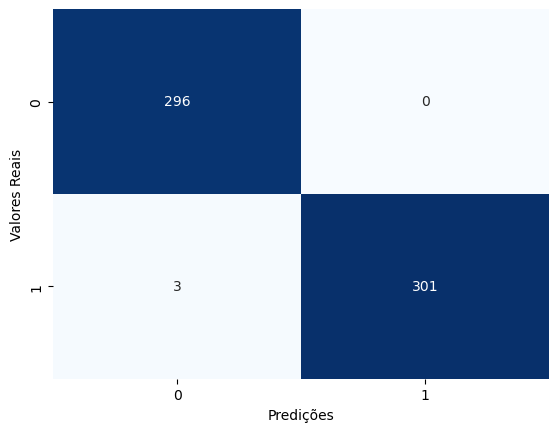

MATRIZ DE CONFUSÃO (VP / FP/ FN/ VN):
 [[296   0]
 [  3 301]]

ACURÁCIA: 0.995

PRECISÃO: 1.0

SENSIBILIDADE/ RECALL: 0.9901315789473685

F1-SCORE: 0.9950413223140495

ESPECIFICIDADE:  1.0


In [73]:
# AVALIAÇÃO DO MODELO A COM DADOS DE SIMULAÇÃO (TREINO) BALANCEADOS
matriz_confusao = confusion_matrix(cb_test, previsoes_balanceadas_a)
sns.heatmap(matriz_confusao, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predições")
plt.ylabel("Valores Reais")
plt.show()

acuracia = accuracy_score(cb_test, previsoes_balanceadas_a)
precisao = precision_score(cb_test, previsoes_balanceadas_a)
recall = recall_score(cb_test, previsoes_balanceadas_a)
f1score = f1_score(cb_test, previsoes_balanceadas_a)
especificidade = calcular_especificidade(matriz_confusao)

print("MATRIZ DE CONFUSÃO (VP / FP/ FN/ VN):\n", matriz_confusao)
print("\nACURÁCIA:", acuracia)
print("\nPRECISÃO:", precisao)
print("\nSENSIBILIDADE/ RECALL:", recall)
print("\nF1-SCORE:", f1score)
print("\nESPECIFICIDADE: ", especificidade)


In [74]:
resultados_acuracia = cross_val_score(classificador_a, previsores_treino, classe_treino, cv=5, scoring='accuracy')
resultados_precisao = cross_val_score(classificador_a, previsores_treino, classe_treino, cv=5, scoring='precision')
resultados_recall = cross_val_score(classificador_a, previsores_treino, classe_treino, cv=5, scoring='recall')
resultados_f1score = cross_val_score(classificador_a, previsores_treino, classe_treino, cv=5, scoring='f1')

print("Resultados Acurácia: ", resultados_acuracia)
print("Acurácia média: ", np.mean(resultados_acuracia))
print("\n")

print("Resultados Precisao: ", resultados_precisao)
print("Precisao média: ", np.mean(resultados_precisao))
print("\n")

print("Resultados Recall: ", resultados_recall)
print("Recall média: ", np.mean(resultados_recall))
print("\n")

print("Resultados f1-score: ",resultados_f1score)
print("F1-Score médio: ", np.mean(resultados_f1score))

Resultados Acurácia:  [1. 1. 1. 1. 1.]
Acurácia média:  1.0


Resultados Precisao:  [0.99009901 1.         1.         1.         0.99009901]
Precisao média:  0.996039603960396


Resultados Recall:  [1. 1. 1. 1. 1.]
Recall média:  1.0


Resultados f1-score:  [0.99502488 1.         1.         1.         0.99502488]
F1-Score médio:  0.9980099502487562


## AVALIAÇÃO DO MODELO 'A' COM DADOS DE SIMULAÇÃO 'DESBALANCEADOS'

In [86]:
previsoes_desbalanceadas_a = classificador_a.predict(pd_test)

In [87]:
# AVALIAÇÃO DO MODELO A COM DADOS DE SIMULAÃO DESBALANCEADOS
matriz_confusao = confusion_matrix(cd_test, previsoes_desbalanceadas_a)
acuracia = accuracy_score(cd_test, previsoes_desbalanceadas_a)
precisao = precision_score(cd_test, previsoes_desbalanceadas_a)
recall = recall_score(cd_test, previsoes_desbalanceadas_a)
f1score = f1_score(cd_test, previsoes_desbalanceadas_a)
especificidade = calcular_especificidade(matriz_confusao)

print("MATRIZ DE CONFUSÃO (VP / FP/ FN/ VN):\n", matriz_confusao)
print("\nACURÁCIA:", acuracia)
print("\nPRECISÃO:", precisao)
print("\nSENSIBILIDADE/ RECALL:", recall)
print("\nF1-SCORE:", f1score)
print("ESPECIFICIDADE: ",especificidade)


MATRIZ DE CONFUSÃO (VP / FP/ FN/ VN):
 [[797   3]
 [  0 199]]

ACURÁCIA: 0.996996996996997

PRECISÃO: 0.9851485148514851

SENSIBILIDADE/ RECALL: 1.0

F1-SCORE: 0.9925187032418953
ESPECIFICIDADE:  0.9851485148514851


In [77]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Treine o modelo novamente com os melhores hiperparâmetros encontrados
classificador_roc = RandomForestClassifier(**melhores_parametros)

# Treine o modelo com os dados balanceados
classificador_roc.fit(pb_train, cb_train)

# Obtenha as probabilidades previstas para a classe positiva (classe "0")
probabilidades_positivas = classificador_roc.predict_proba(pb_test)[:, 1]

# Calcule a curva ROC
fpr, tpr, thresholds = roc_curve(cb_test, probabilidades_positivas)

# Calcule a área sob a curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Visualize a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


NameError: name 'melhores_parametros' is not defined

# TREINAMENTO DO MODELO 'B' COM DADOS DESBALANCEADOS

In [117]:
# SEPARANDO CONJUNTOS DE DADOS PARA TREINO E TESTE 
pb_train, pb_test, cb_train, cb_test = train_test_split(previsores_treino, classe_treino, test_size=999)
pd_train, pd_test, cd_train, cd_test = train_test_split(previsores_testagem, classe_testagem, train_size=0.80)

In [118]:
# CRIANDO CLASSIFICADOR BASE
'''
classificador_base = RandomForestClassifier(random_state=42)

# CONFIGURANDO GRIDSEARCHCV PARA MELHOR ESCOLHA DOS HIPERPARÂMETROS COM DADOS BALANCEADOS
grid_search = GridSearchCV(classificador_base, parametros, cv=3, scoring='precision')

grid_search.fit(pd_train, cd_train)

grid_search.best_params_

'''
{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}
'''
'''


'\n'

In [119]:
classificador_b = RandomForestClassifier(# CLASSIFICADOR COM PARÂMETROS ADVINDOS DO GRID SEARCH
    bootstrap=True,
    criterion='gini',
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=10
)

In [120]:
# TREINANDO CLASSIFICADOR COM DADOS DESBALANCEADOS
classificador_b.fit(pd_train, cd_train)

RandomForestClassifier(n_estimators=10)

In [121]:
# APLICANDO PREDIÇÕES EM BASE PRÓPRIA DE TSTES DESBALANCEADOS
previsoes_desbalanceadas_b = classificador_b.predict(pd_test) 
previsoes_desbalanceadas_b

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0], dtype=int64)

# AVALIAÇÃO DO MODELO 'B' COM DADOS DESBALANCEADOS 

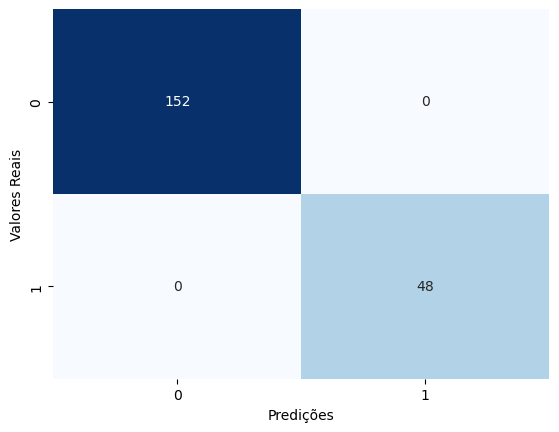

MATRIZ DE CONFUSÃO (VP / FP/ FN/ VN):
 [[152   0]
 [  0  48]]

ACURÁCIA: 1.0

PRECISÃO: 1.0

SENSIBILIDADE/ RECALL: 1.0

F1-SCORE: 1.0

ESPECIFICIDADE:  1.0


In [122]:
# AVALIAÇÃO DO MODELO
matriz_confusao_b = confusion_matrix(cd_test, previsoes_desbalanceadas_b)
sns.heatmap(matriz_confusao_b, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predições")
plt.ylabel("Valores Reais")
plt.show()

acuracia = accuracy_score(cd_test, previsoes_desbalanceadas_b)
precisao = precision_score(cd_test, previsoes_desbalanceadas_b)
recall = recall_score(cd_test, previsoes_desbalanceadas_b)
f1score = f1_score(cd_test, previsoes_desbalanceadas_b)
especificidade = calcular_especificidade(matriz_confusao_b)

print("MATRIZ DE CONFUSÃO (VP / FP/ FN/ VN):\n", matriz_confusao_b)
print("\nACURÁCIA:", acuracia)
print("\nPRECISÃO:", precisao)
print("\nSENSIBILIDADE/ RECALL:", recall)
print("\nF1-SCORE:", f1score)
print("\nESPECIFICIDADE: ", especificidade)

## AVALIAÇÃO DO MODELO 'B' COM DADOS BALANCEADOS

In [123]:
# PREVISOES COM BASE NO CONJUNTO DE TESTAGEM COM DADOS BALANCEADOS
previsoes_balanceadas_b = classificador_b.predict(pb_test)

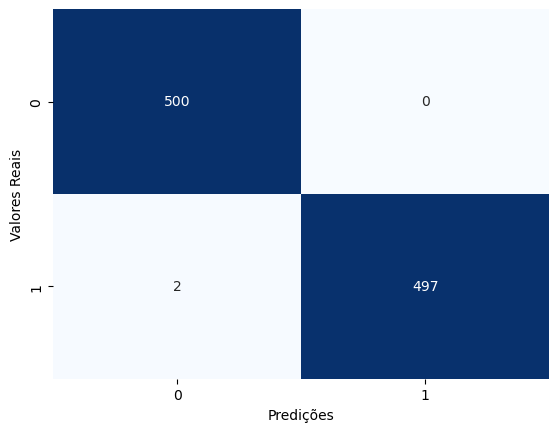

MATRIZ DE CONFUSÃO (VP / FP/ FN/ VN):
 [[500   0]
 [  2 497]]

ACURÁCIA: 0.997997997997998

PRECISÃO: 1.0

SENSIBILIDADE/ RECALL: 0.9959919839679359

F1-SCORE: 0.9979919678714859

ESPECIFICIDADE:  1.0


In [124]:
# AVALIAÇÃO DO MODELO EM RELAÇÃO AOS DADOS BALANCEADOS (500-500)
# AVALIAÇÃO DO MODELO
matriz_confusao_b = confusion_matrix(cb_test, previsoes_balanceadas_b)
sns.heatmap(matriz_confusao_b, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predições")
plt.ylabel("Valores Reais")
plt.show()

acuracia = accuracy_score(cb_test, previsoes_balanceadas_b)
precisao = precision_score(cb_test, previsoes_balanceadas_b)
recall = recall_score(cb_test, previsoes_balanceadas_b)
f1score = f1_score(cb_test, previsoes_balanceadas_b)
especificidade = calcular_especificidade(matriz_confusao_b)

print("MATRIZ DE CONFUSÃO (VP / FP/ FN/ VN):\n", matriz_confusao_b)
print("\nACURÁCIA:", acuracia)
print("\nPRECISÃO:", precisao)
print("\nSENSIBILIDADE/ RECALL:", recall)
print("\nF1-SCORE:", f1score)
print("\nESPECIFICIDADE: ", especificidade)